In [ ]:
# Install FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

# PDE problem
With the notation above, the model problem to be solved with  **Robin boundary condition** (convective boundary condition) can be formulated as follows:

$$
\begin{alignat}{2}
-\nabla\cdot(\kappa\nabla T) &= f \quad&&\mbox{in } \Omega, \tag{1}\\
-\kappa{\partial T\over\partial n} &= h(T-T_0) \quad&&\mbox{on } \partial \Omega,\quad
\tag{2}
\end{alignat}
$$

# Variational formulation

As usual, we multiply by a test function v:

$$
-\int_{\Omega} \nabla\cdot(\kappa\nabla T) v dx = \int_{\Omega} f v dx
$$

and integrate by parts:

$$
 \int_\Omega \kappa\nabla T\cdot \nabla v dx -
\int_{\partial\Omega}\kappa\frac{\partial T}{\partial n}v ds = \int_{\Omega} f v dx
$$

Inserting the boundary conditions, we obtain

$$
\int_\Omega \kappa\nabla T\cdot \nabla v dx +
\int_{\partial\Omega}h(T-T_0) v ds = \int_\Omega f v dx
$$

We thus obtain the following variational problem:

$$
\begin{equation*}
\int_\Omega \kappa\nabla T\cdot \nabla v dx +
\int_{\partial\Omega}h T v ds  = \int_\Omega f v dx +
\int_{\partial\Omega}h T_0 v ds
\end{equation*}
$$

We then have

$$
a(T, v) =
\int_\Omega \kappa\nabla T\cdot \nabla v dx +
\int_{\partial\Omega}h T v ds
$$
and
$$
L(v)= \int_\Omega f v dx +
\int_{\partial\Omega}h T_0 v ds .
$$

#  Example:

$$
\Omega = (0,1)^2,
$$

$$
f(x, y) = \pi^2 sin(\pi x) sin(\pi y),
$$
$$
\kappa = 1,
$$
$$
h = 1,
$$
\begin{eqnarray*}
T_0(x, y) = 0.
\end{eqnarray*}

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/local/lib/python3.7/dist-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'interactive'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


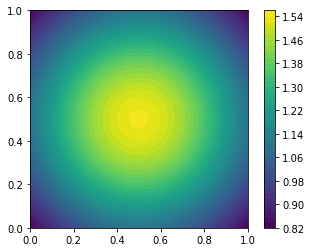

In [ ]:
# Import FEniCS
from dolfin import *
#
import math

# Enable plotting inside the notebook
import matplotlib.pyplot as plt

# to plot the result in the Notebook
%matplotlib inline

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

#
#
k = Constant(1.0)
f = Expression('pi*pi*sin(pi*x[0])*sin(pi*x[1])', degree=3)
r = Constant(1.0)
s = Constant(0.0)
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = k*inner(grad(u), grad(v))*dx + r*u*v*ds
L = f*v*dx + r*s*v*ds

# Compute solution
u = Function(V)
solve(a == L, u)

# Plot solution
p = plot(u, interactive=True)
plt.colorbar(p)